In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')


In [3]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
print(data.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

Unit price: mu = 55.67, sigma = 26.48
Unit price: Skewness: 0.01
Unit price: Kurtosis: -1.22


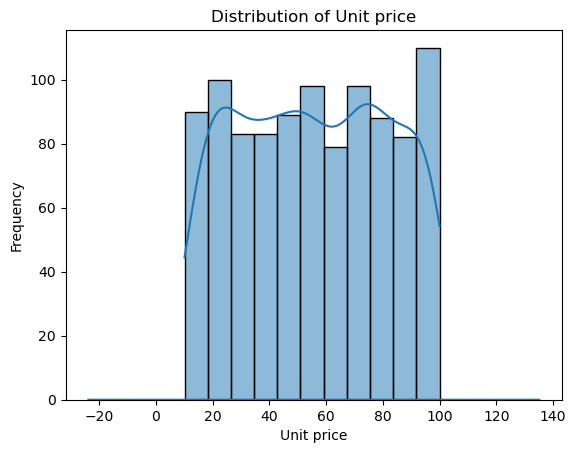

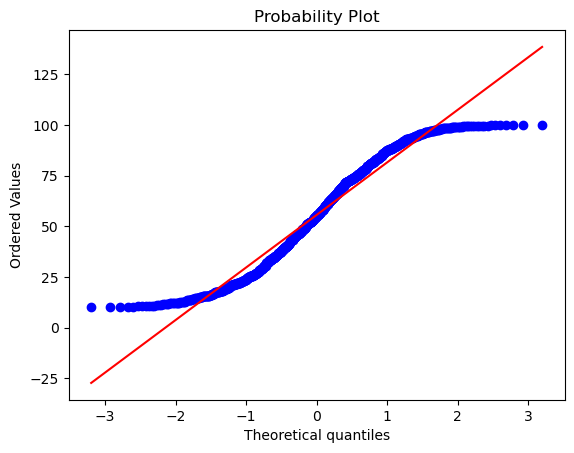

Total: mu = 322.97, sigma = 245.76
Total: Skewness: 0.89
Total: Kurtosis: -0.08


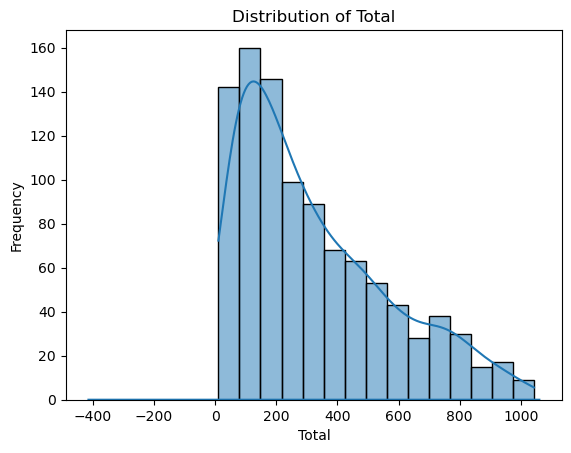

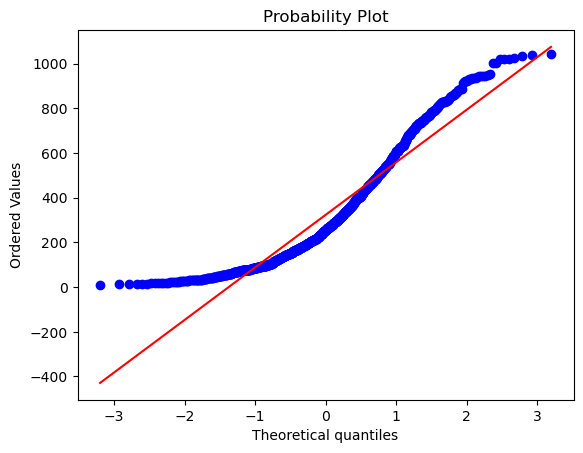

Rating: mu = 6.97, sigma = 1.72
Rating: Skewness: 0.01
Rating: Kurtosis: -1.15


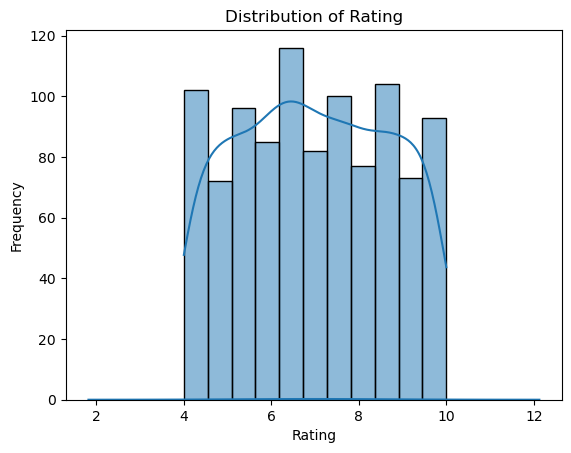

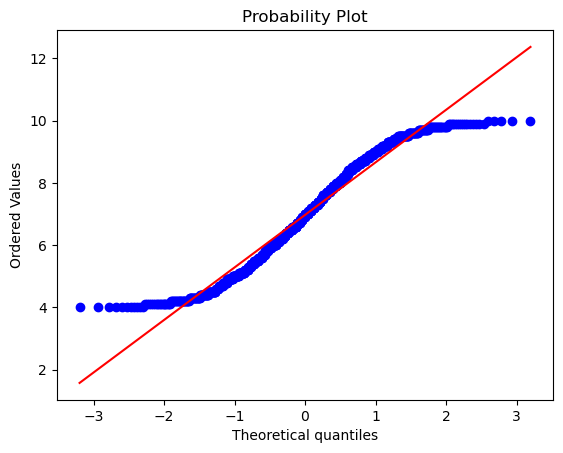

gross income: mu = 15.38, sigma = 11.70
gross income: Skewness: 0.89
gross income: Kurtosis: -0.08


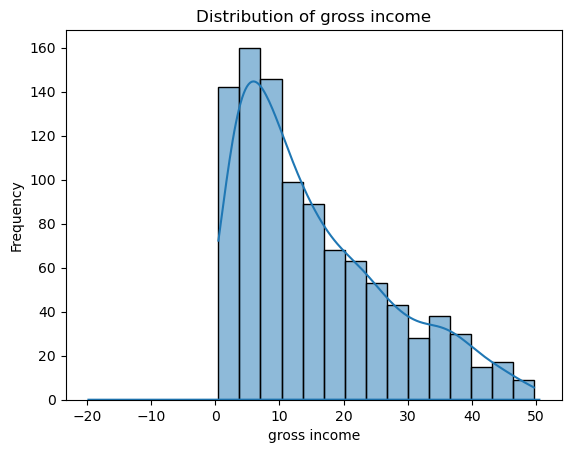

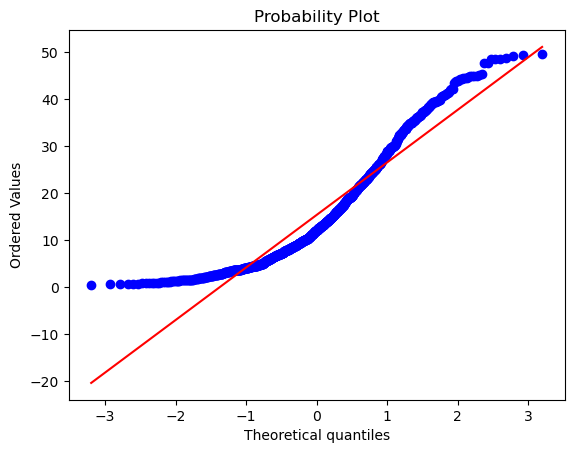

In [6]:
# Create a list of the columns to analyze
columns = ['Unit price', 'Total', 'Rating', 'gross income']

# Loop over the columns and plot the distribution of each variable
for col in columns:
    # Plot the distribution of the data
    sns.histplot(data[col], kde=True)

    # Fit a normal distribution to the data
    (mu, sigma) = stats.norm.fit(data[col])
    print('{}: mu = {:.2f}, sigma = {:.2f}'.format(col, mu, sigma))
    # Calculate the skewness and kurtosis of the data
    print('{}: Skewness: {:.2f}'.format(col, data[col].skew()))
    print('{}: Kurtosis: {:.2f}'.format(col, data[col].kurt()))

    # Add the fitted normal distribution to the plot
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    y = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, y, label='Normal fit')

    # Add labels and title to the plot
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))

    # Plot the QQ-plot
    fig = plt.figure()
    stats.probplot(data[col], plot=plt)
    plt.show()

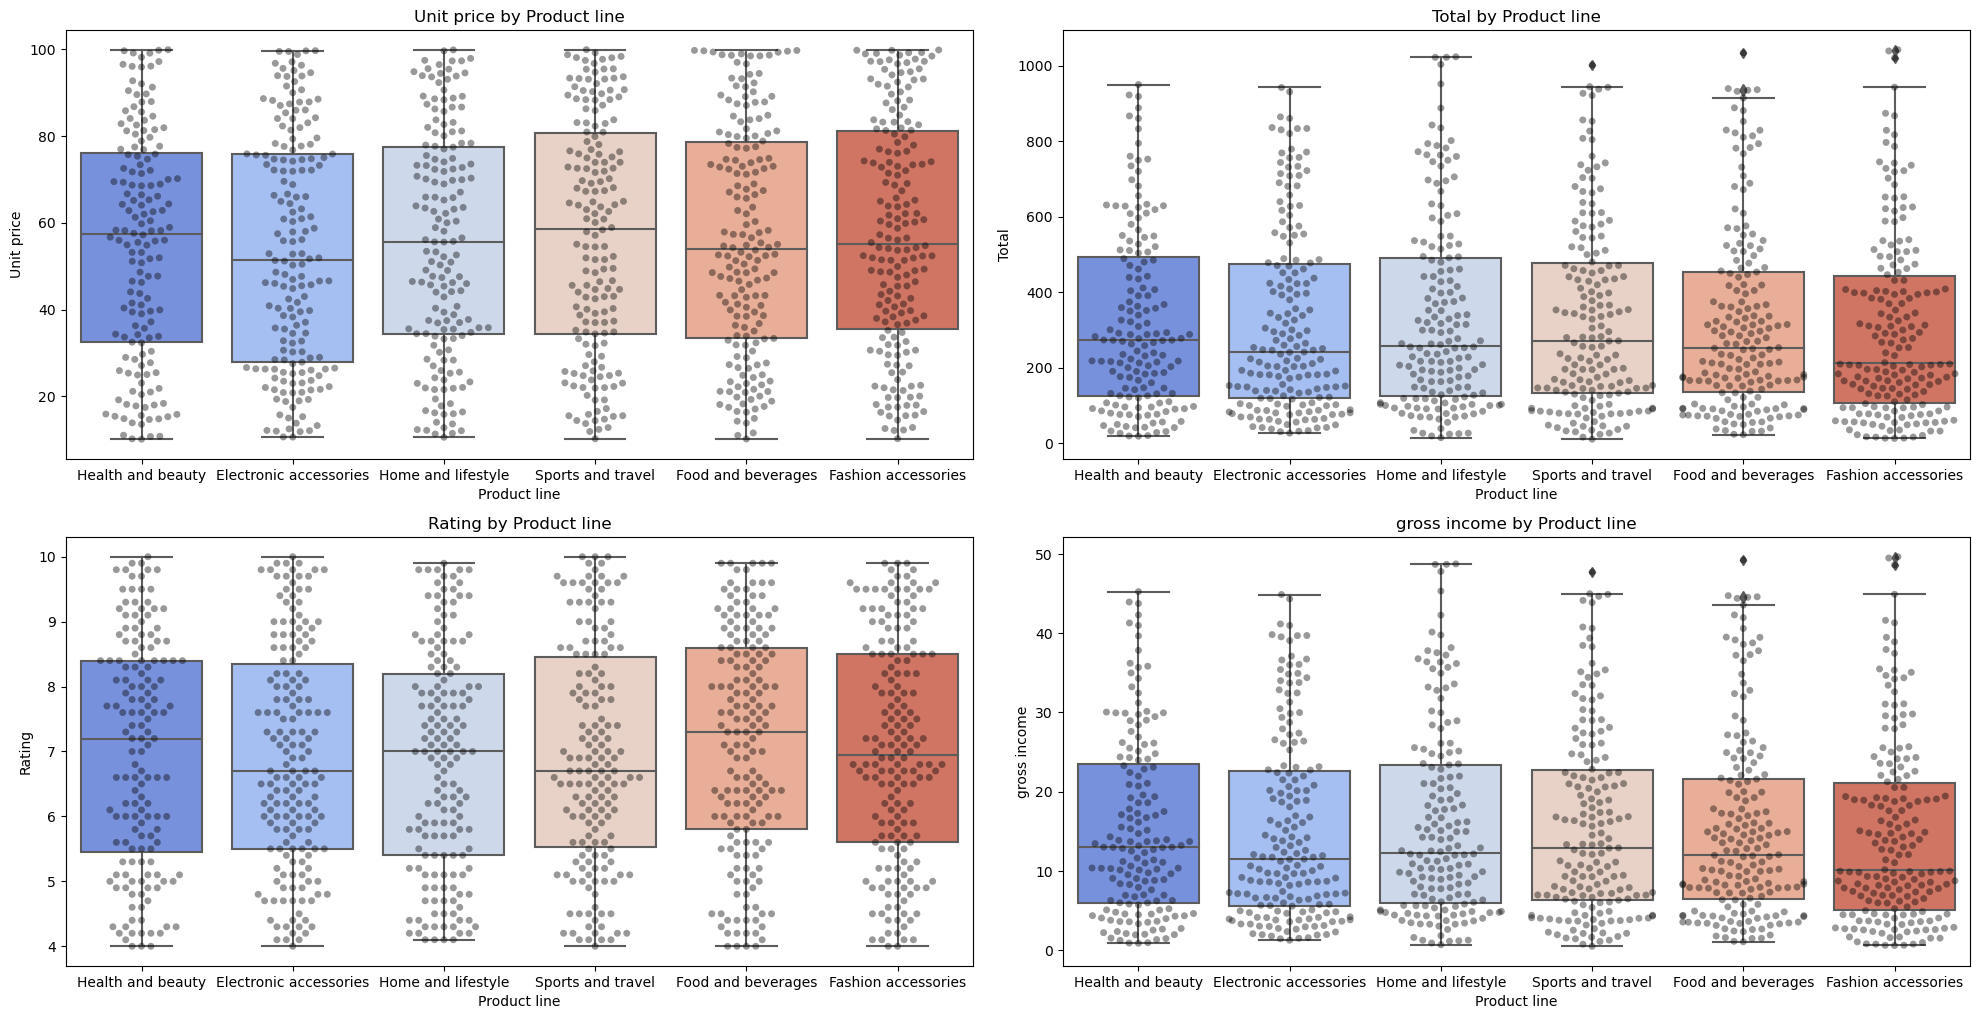

In [7]:
# Box plots and swarm plots
columns = ['Unit price', 'Total', 'Rating', 'gross income']

plt.figure(figsize=(20, 20))
for i, column in enumerate(columns):
    plt.subplot(len(columns), 2, i + 1)
    sns.boxplot(x='Product line', y=column, data=data, palette='coolwarm')
    sns.swarmplot(x='Product line', y=column, data=data, color='black', alpha=0.4)
    plt.title(f'{column} by Product line')
plt.tight_layout()
plt.show()

In [8]:

#Convert the 'Time' column to a datetime object and filter the data to only include store open hours:
data['Time'] = pd.to_datetime(data['Time'])
data = data[(data['Time'].dt.hour >= 10) & (data['Time'].dt.hour < 21)]

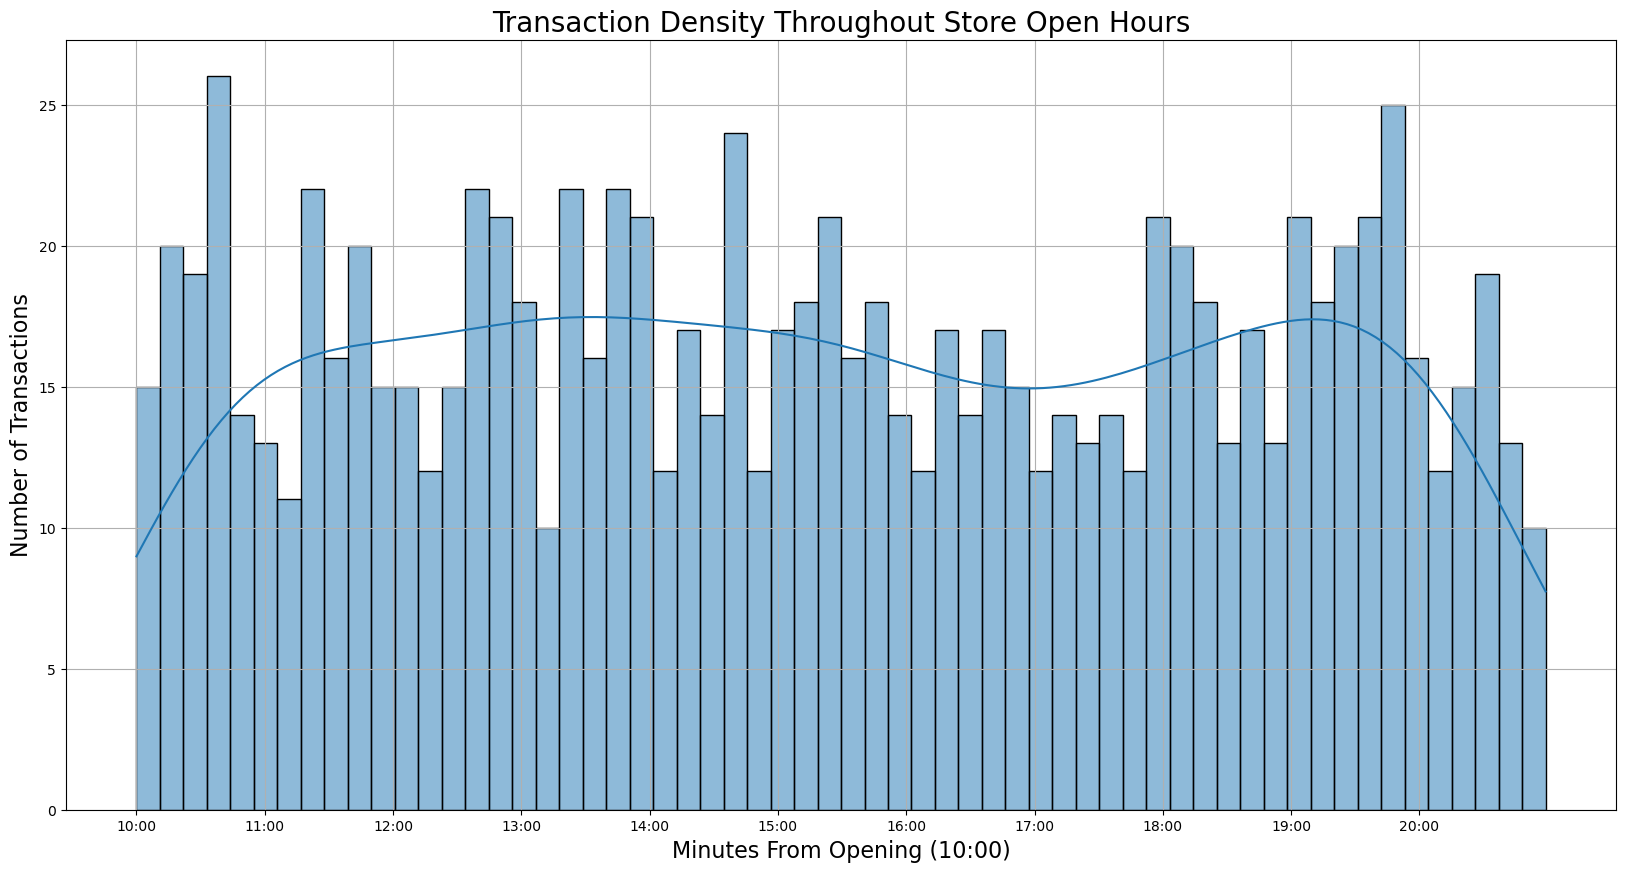

In [9]:
#Convert 'Time' to minutes from store opening:
data['MinutesFromOpening'] = (data['Time'].dt.hour - 10) * 60 + data['Time'].dt.minute
#Create a distribution plot to visualize the transaction density:
plt.figure(figsize=(20, 10))
sns.histplot(data=data, x='MinutesFromOpening', bins=60, kde=True)
plt.title('Transaction Density Throughout Store Open Hours', fontsize=20)
plt.xlabel('Minutes From Opening (10:00)', fontsize=16)
plt.ylabel('Number of Transactions', fontsize=16)
plt.xticks(np.arange(0, 660, 60), [f"{10 + t // 60:02d}:{t % 60:02d}" for t in np.arange(0, 660, 60)])
plt.grid(True)
plt.show()

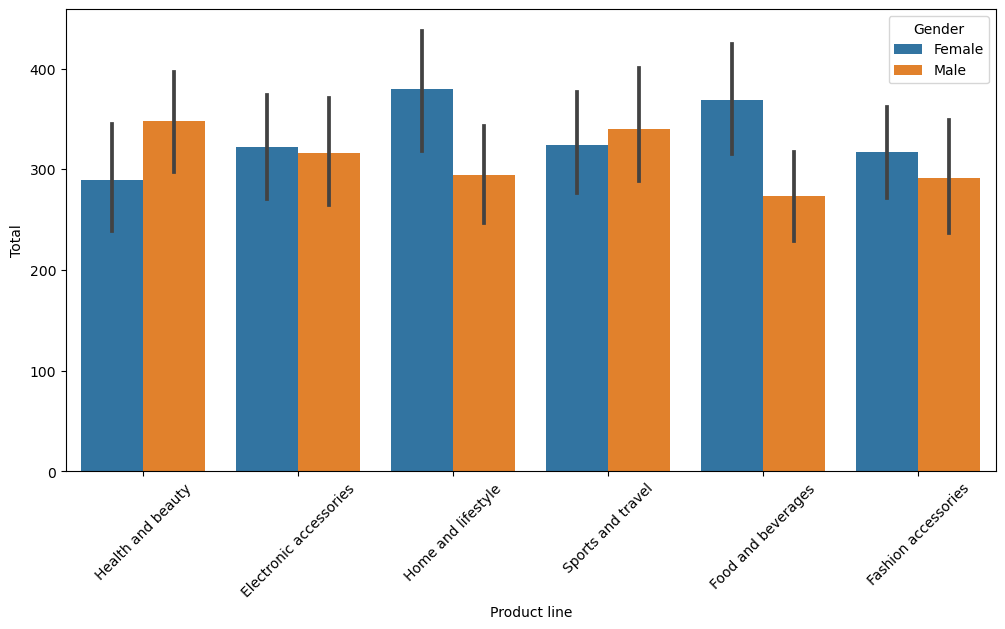

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Total', hue='Gender', data=data)
plt.xticks(rotation=45)
plt.show()

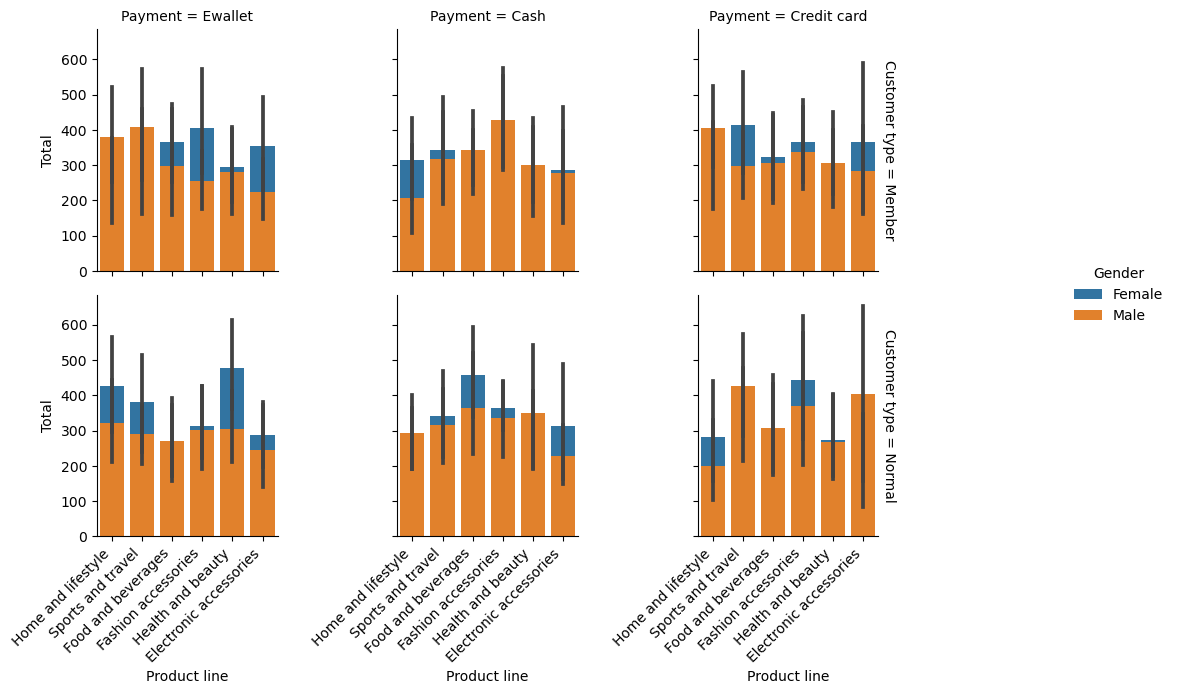

In [11]:
g = sns.FacetGrid(data, col='Payment', row='Customer type', hue='Gender', margin_titles=True)
g.map(sns.barplot, 'Product line', 'Total')

# Set custom legend properties
g.add_legend(title='Gender', bbox_to_anchor=(1.05, 0.5), loc='center left', borderaxespad=0)

# Improve the readability of the 'Product line' labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

plt.show()

In [12]:
# Resample the data to show weekly total sales
data['Date'] = pd.to_datetime(data['Date'])
weekly_data = data.groupby(['City', pd.Grouper(key='Date', freq='W')])['Total'].sum().reset_index()

In [13]:
mean_total_sales = weekly_data.groupby('Date')['Total'].mean().reset_index()
mean_total_sales.rename(columns={'Total': 'Mean Total Sales'}, inplace=True)

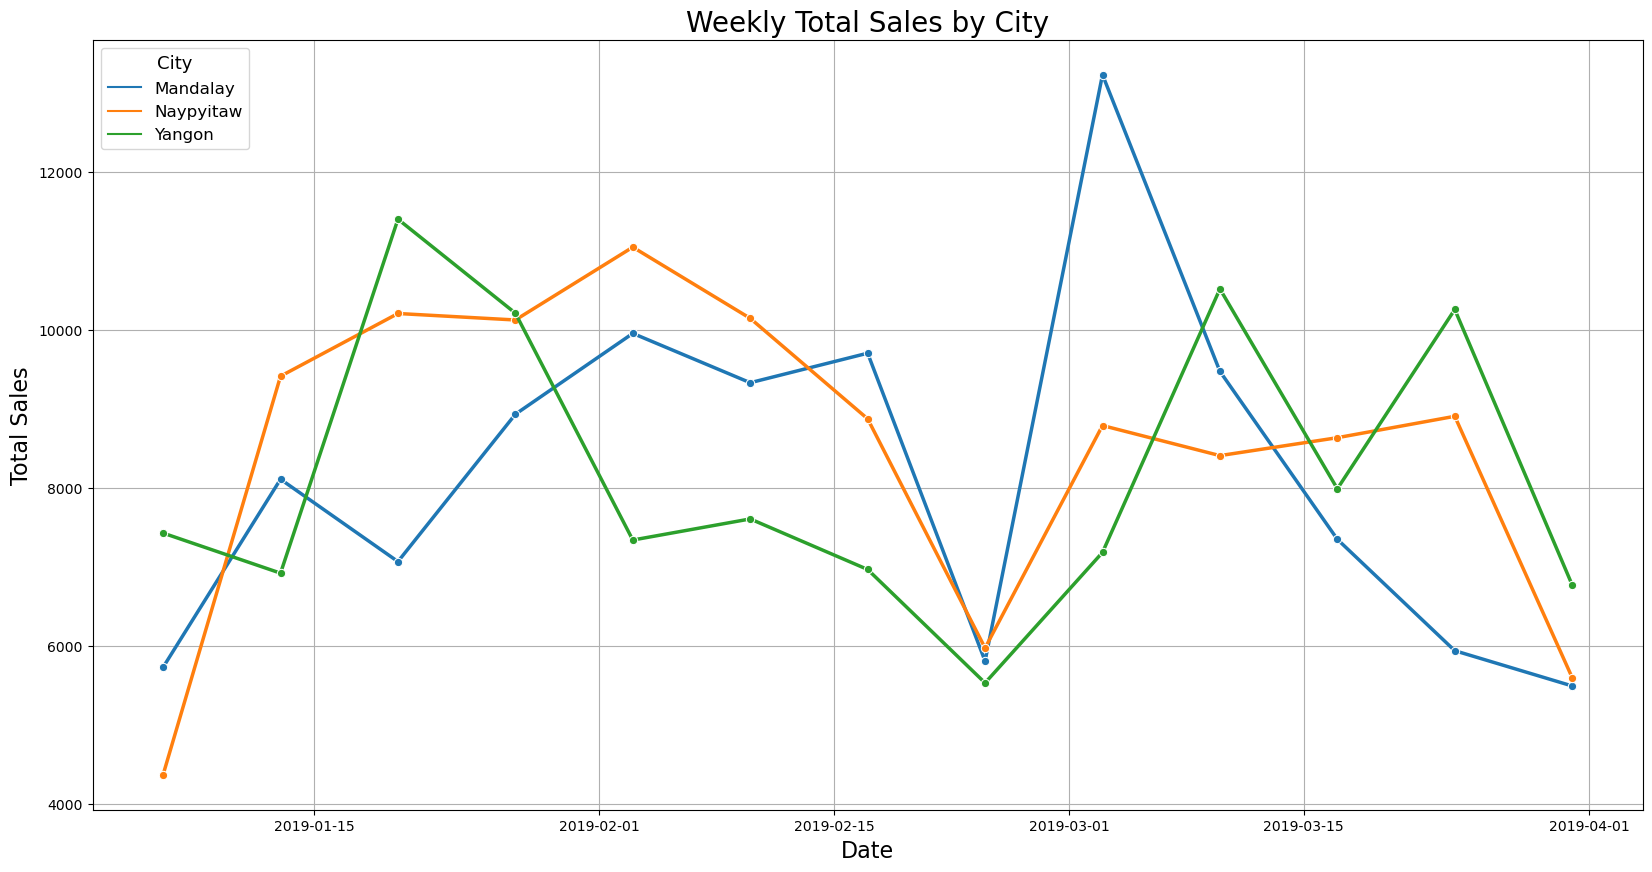

In [14]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='Date', y='Total', hue='City', data=weekly_data, marker='o', linewidth=2.5)
plt.title('Weekly Total Sales by City', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Total Sales', fontsize=16)
plt.grid(True)
plt.legend(title='City', title_fontsize='13', loc='upper left', fontsize='12')
plt.show()

In [15]:
data['Month'] = data['Date'].dt.month

In [16]:
grouped_data = data.groupby(['City', 'Month'])['Total'].sum().reset_index()

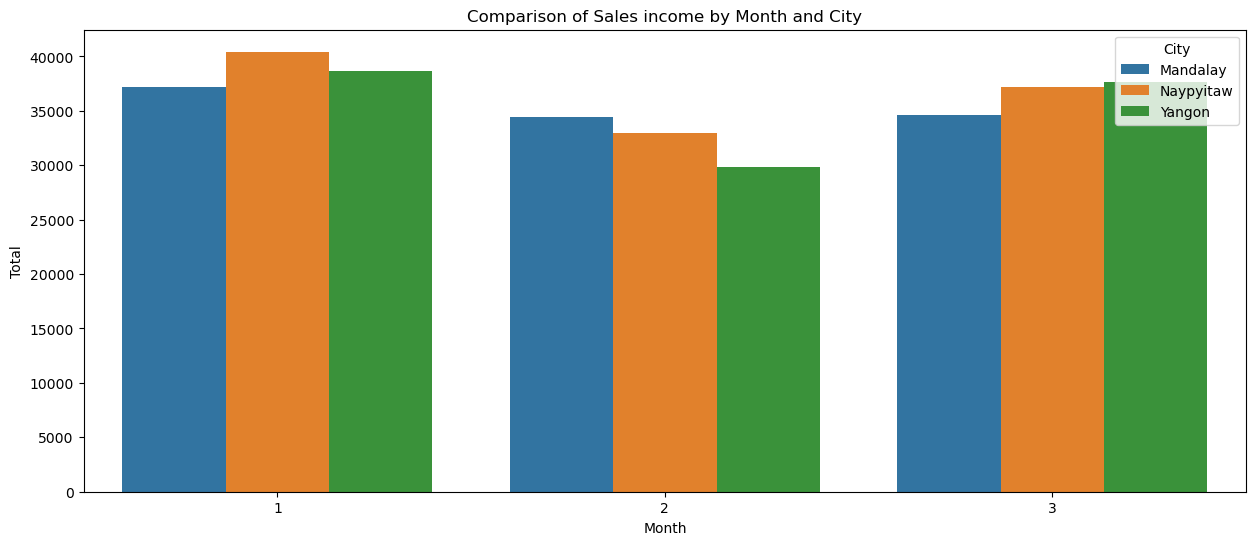

In [17]:
# Visualize the comparison using a bar plot
plt.figure(figsize=(15, 6))
sns.barplot(x='Month', y='Total', hue='City', data=grouped_data)
plt.title('Comparison of Sales income by Month and City')
plt.xlabel('Month')
plt.ylabel('Total')
plt.legend(title='City', loc='upper right')
plt.show()

In [18]:
# Convert 'Date' to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Date features
data['day_of_week'] = data['Date'].dt.dayofweek
data['day_of_month'] = data['Date'].dt.day
data['month'] = data['Date'].dt.month
data['year'] = data['Date'].dt.year

# Time features
data['Time'] = pd.to_datetime(data['Time'])
def map_time_interval(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

    # Apply the function to the 'Time' column
data['time_interval'] = data['Time'].apply(map_time_interval)

In [19]:
# One-Hot Encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['City', 'Customer type', 'Gender', 'Product line', 'time_interval'], drop_first=True)

In [20]:
# Drop unnecessary columns
data_encoded.drop(['Invoice ID', 'Date', 'Time','Tax 5%','gross margin percentage','cogs','year'], axis=1, inplace=True)

In [21]:
# Identify non-numeric columns
non_numeric_columns = data_encoded.select_dtypes(include=['object']).columns

In [22]:
data_encoded = pd.get_dummies(data_encoded, columns=non_numeric_columns, drop_first=True)

In [23]:
X = data_encoded.drop('Rating', axis=1)
y = data_encoded['Rating']

In [24]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Model comparison

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(f"{name}: {r2}")

Linear Regression: -0.06720045565680821
Decision Tree: -0.7273425907356699
Random Forest: -0.1022281160810179
SVR: -0.15402846233357947
KNN: -0.24391686698685722
Neural Network: -0.4883313140342833


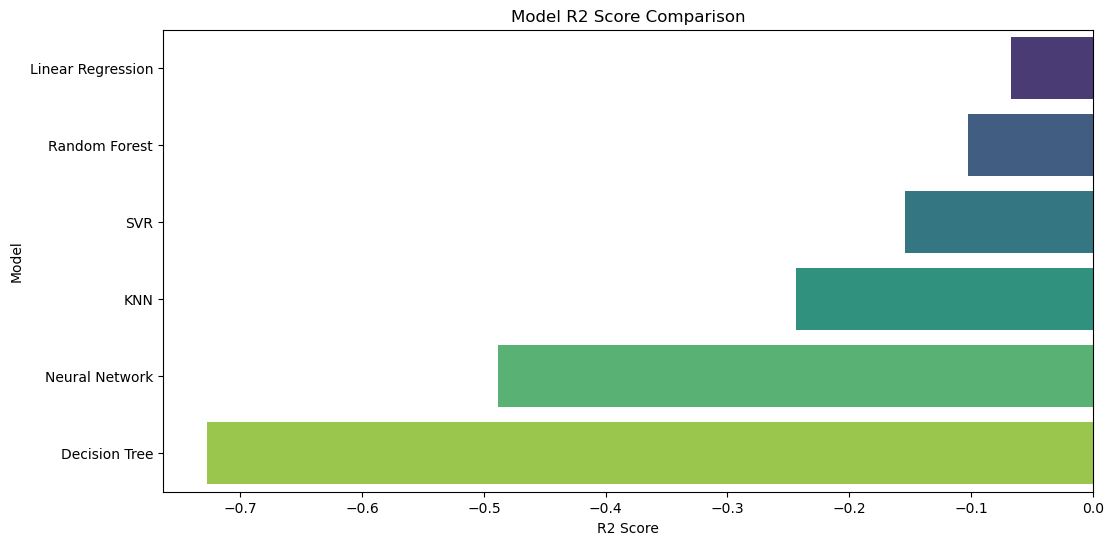

In [26]:
# Visualization
results_df = pd.DataFrame({"Model": list(results.keys()), "R2 Score": list(results.values())})
results_df = results_df.sort_values(by="R2 Score", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="R2 Score", y="Model", palette="viridis")
plt.title("Model R2 Score Comparison")
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.show()